In [74]:
%load_ext autoreload
%autoreload 2
from tools import *
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
alltxts,all_labs=parse_movies()

In [76]:
text_train, text_test, y_train, y_test = train_test_split(alltxts, \
                                                          all_labs, \
                                                          stratify=all_labs,\
                                                          test_size=0.3,\
                                                          random_state=0)

In [77]:
stop_words = english_stopwords()

In [78]:
txt_test = parse_ftest(fname ="moviesTest/testSentiment.txt")

In [79]:
print(np.count_nonzero(np.array(all_labs)== -1))
print(np.count_nonzero(np.array(all_labs)== 1))
#on a les donnees equilibrées donc on va calculer l'accuracy pour évaluer notre modéle

1000
1000


### Version 0 : pas de pré-processing

In [80]:
vectorizer0 = build_vectorizer(text_train,b_rmnumbers=False,l=1)
X_train0 = vectorize_docs(vectorizer0, text_train) 
X_test0 = vectorize_docs(vectorizer0, text_test) 

In [81]:
mean_scores  = []
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]
for C in interval:
    clf = LinearSVC(C=C,class_weight='balanced')
    scores = cross_val_score(clf, X_train0, y_train, cv=10)
    mean_scores.append(np.mean(scores))

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to conver

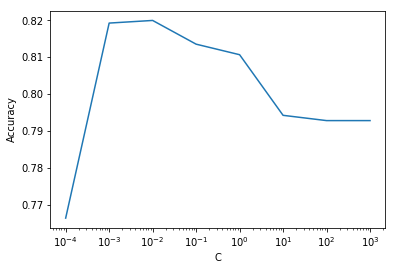

In [82]:
ax = plt.gca()

ax.plot(interval, mean_scores)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.axis('tight')
plt.show()

In [83]:
C_star = interval[np.argmax(mean_scores)]

clf0 = LinearSVC (C=C_star,class_weight='balanced')
clf0.fit(X_train0, y_train)
clf0.score(X_test0,y_test)

0.82666666666666666

In [89]:
ind_neg = np.argsort(clf0.coef_).flatten()[0:10]
ind_pos = np.argsort(clf0.coef_).flatten()[clf0.coef_.shape[1]-10:]

print(np.array(vectorizer0.get_feature_names())[ind_neg])
print(np.array(vectorizer0.get_feature_names())[ind_pos])

['bad' 'script' 'nothing' 'director' 'worst' 'any' 'only' 'poor' 'plot'
 'unfortunately']
['also' 'memorable' 'perfectly' 'movies' 'well' 'very' 'seen' 'quite'
 'without' 'great']


In [12]:
clf0 = LinearSVC(C=C_star)
pred0 = eval_on_final_test(vectorizer0, clf0, alltxts, all_labs, txt_test,0,l=1)
#score sur serveur 0.788488460462

### Version 1: en enlevant les stopwords +lowercase+remove numbers

In [21]:
vectorizer1= build_vectorizer(text_train,stopwords=stop_words,l=1, b_lowercase=False)
X_train1 = vectorize_docs(vectorizer1, text_train) 
X_test1 = vectorize_docs(vectorizer1, text_test) 

Removing numbers
Keeping uppercase


In [22]:
mean_scores  = []
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]
for C in interval:
    clf = LinearSVC(C=C,class_weight='balanced')
    scores = cross_val_score(clf, X_train1, y_train, cv=10)
    mean_scores.append(np.mean(scores))

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


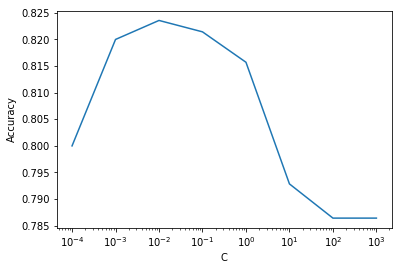

In [24]:
ax = plt.gca()

ax.plot(interval, mean_scores)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.axis('tight')
plt.show()

In [25]:
C_star = interval[np.argmax(mean_scores)]

clf1 = LinearSVC (C=C_star,class_weight='balanced')
clf1.fit(X_train1, y_train)
clf1.score(X_test1,y_test)

0.82999999999999996

In [17]:
clf1 = LinearSVC(C=C_star)
pred1 = eval_on_final_test(vectorizer1, clf1, alltxts, all_labs, txt_test, 1,l=1)
#score sur serveur 0.788488460462

### Version 2a : uppercase /Removing accents/Keeping the top 10000 occurring tokens+remove numbers


In [26]:
vectorizer2 = build_vectorizer(alltxts,stopwords=stop_words, b_accent=False,\
                                           max_f=10000,l=1)
X_train2 = vectorize_docs(vectorizer2, text_train) 
X_test2 = vectorize_docs(vectorizer2, text_test)

Removing numbers
Removing accents
Keeping the top 10000 occurring tokens


In [27]:
mean_scores  = []
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]
for C in interval:
    clf = LinearSVC(C=C,class_weight='balanced')
    scores = cross_val_score(clf, X_train2, y_train, cv=10)
    mean_scores.append(np.mean(scores))

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


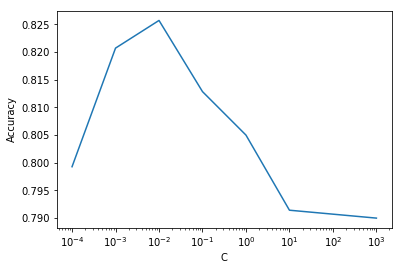

In [28]:
ax = plt.gca()

ax.plot(interval, mean_scores)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.axis('tight')
plt.show()

In [29]:
C_star = interval[np.argmax(mean_scores)]

clf2 = LinearSVC (C=C_star,class_weight='balanced')
clf2.fit(X_train2, y_train)
clf2.score(X_test2,y_test)

0.82166666666666666

In [22]:
clf2 = LinearSVC(C=C_star)
pred2 = eval_on_final_test(vectorizer2, clf2, alltxts, all_labs, txt_test, 2,l=1)
# score sur serveur 	0.804207831687

### Version 2b : uppercase /Removing accents/Keeping the top 10000 occurring tokens+remove numbers/stemming

In [42]:
vectorizer2b = build_vectorizer(alltxts,stopwords=stop_words, b_accent=False,\
                                           max_f=10000,l=1, b_stemming=True)
X_train2b = vectorize_docs(vectorizer2b, text_train) 
X_test2b = vectorize_docs(vectorizer2b, text_test)

Stemming
Removing numbers
Removing accents
Keeping the top 10000 occurring tokens


In [43]:
mean_scores  = []
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]
for C in interval:
    clf = LinearSVC(C=C,class_weight='balanced')
    scores = cross_val_score(clf, X_train2b, y_train, cv=10)
    mean_scores.append(np.mean(scores))

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


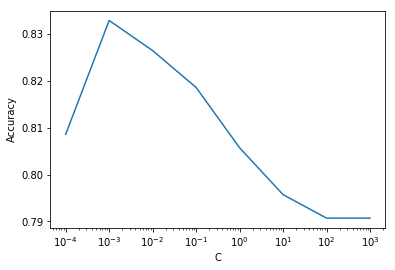

In [44]:
ax = plt.gca()

ax.plot(interval, mean_scores)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.axis('tight')
plt.show()

In [45]:
C_star = interval[np.argmax(mean_scores)]

clf2b = LinearSVC (C=C_star,class_weight='balanced')
clf2b.fit(X_train2b, y_train)
clf2b.score(X_test2b,y_test)

0.84833333333333338

## Version 3 : remove numbers + 2-grammes

In [91]:
vectorizer4 = build_vectorizer(text_train,n=(2,2),b_accent=False,l=1)
X_train4 = vectorize_docs(vectorizer4, text_train) 
X_test4 = vectorize_docs(vectorizer4, text_test) 

Removing numbers
Removing accents


In [69]:
vectorizer4.get_feature_names()

['____ from',
 '_____ at',
 '_____ level',
 '_____ when',
 '______ and',
 '______ killed',
 '__________________________________________________________ atom',
 '_a_night_at_the_roxbury_ takes',
 '_a_night_at_the_roxbury_ you',
 '_all_ of',
 '_amadeus_ make',
 '_american_psycho_ so',
 '_and_ he',
 '_and_ not',
 '_and_ park',
 '_anything_ large',
 '_are_ intoxicated',
 '_armageddon_ could',
 '_babe_ is',
 '_beloved_ intriguing',
 '_beloved_ most',
 '_beloved_ somewhat',
 '_beloved_ ultimately',
 '_blade runner_',
 '_blade_ had',
 '_blade_ was',
 '_boom_ and',
 '_brazil_ or',
 '_but limited_',
 '_can t_',
 '_can_ do',
 '_casablanca_ does',
 '_cliffhanger ii_',
 '_cliffhanger_ had',
 '_cliffhanger_ paramedic',
 '_cliffhanger_ too',
 '_come_ from',
 '_daylight_ bad',
 '_daylight_ is',
 '_death in',
 '_dirty_work_ what',
 '_do_ look',
 '_do_ without',
 '_does_ do',
 '_does_ have',
 '_does_ sing',
 '_dog fancy_',
 '_don do',
 '_don t_',
 '_double_team_ juicing',
 '_double_team_ let',
 '_drago

In [92]:
mean_scores  = []
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]
for C in interval:
    clf = LinearSVC(C=C,class_weight='balanced')
    scores = cross_val_score(clf, X_train4, y_train, cv=10)
    mean_scores.append(np.mean(scores))

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


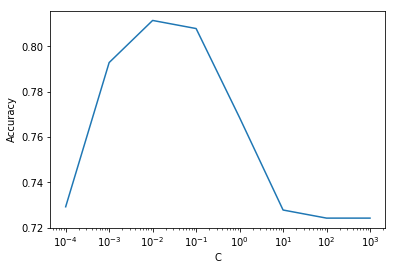

In [93]:
ax = plt.gca()

ax.plot(interval, mean_scores)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.axis('tight')
plt.show()

In [94]:
C_star = interval[np.argmax(mean_scores)]

clf4 = LinearSVC (C=C_star,class_weight='balanced')
clf4.fit(X_train4, y_train)
clf4.score(X_test4,y_test)

0.80166666666666664

In [98]:
ind_neg = np.argsort(clf4.coef_).flatten()[0:10]
ind_pos = np.argsort(clf4.coef_).flatten()[clf4.coef_.shape[1]-10:]

print(np.array(vectorizer4.get_feature_names())[ind_neg])
print(np.array(vectorizer4.get_feature_names())[ind_pos])

['the worst' 'have been' 'the only' 'supposed to' 'at least' 'should have'
 'it just' 'to be' 'but the' 'the script']
['but it' 'very well' 'even if' 'due to' 'the right' 'as well' 'he is'
 'as the' 'is very' 'the best']


In [99]:
np.array(vectorizer4.get_feature_names())[ind_pos]

array(['but it', 'very well', 'even if', 'due to', 'the right', 'as well',
       'he is', 'as the', 'is very', 'the best'],
      dtype='<U64')

In [73]:
clf4 = LinearSVC(C=C_star)
pred4 = eval_on_final_test(vectorizer4, clf4, alltxts, all_labs, txt_test, 4,l=1)

## Version 5 : remove numbers + 3-grammes

In [100]:
vectorizer5 = build_vectorizer(text_train,n=(3,3),l=1)
X_train5 = vectorize_docs(vectorizer5, text_train) 
X_test5 = vectorize_docs(vectorizer5, text_test) 

Removing numbers


In [101]:
vectorizer5.get_feature_names()

['____ from hell',
 '_____ at least',
 '_____ level in',
 '_____ when he',
 '______ and frears',
 '______ and jack',
 '______ killed his',
 '__________________________________________________________ atom egoyan',
 '_a_night_at_the_roxbury_ takes an',
 '_a_night_at_the_roxbury_ you ll',
 '_all_ of them',
 '_amadeus_ make it',
 '_american_psycho_ so it',
 '_and_ he just',
 '_and_ not funny',
 '_and_ park place',
 '_anything_ large enough',
 '_are_ intoxicated but',
 '_armageddon_ could ever',
 '_babe_ is sent',
 '_beloved_ intriguing aspects',
 '_beloved_ most memorable',
 '_beloved_ somewhat of',
 '_beloved_ ultimately tells',
 '_blade runner_ co',
 '_blade runner_ is',
 '_blade_ had decent',
 '_blade_ was derived',
 '_boom_ and it',
 '_brazil_ or perhaps',
 '_but limited_ babe',
 '_can t_ but',
 '_can_ do better',
 '_casablanca_ does wonderful',
 '_cliffhanger ii_ it',
 '_cliffhanger_ had villain',
 '_cliffhanger_ paramedic on',
 '_cliffhanger_ too perhaps',
 '_come_ from that',
 '_da

In [102]:
mean_scores  = []
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]
for C in interval:
    clf = LinearSVC(C=C,class_weight='balanced')
    scores = cross_val_score(clf, X_train5, y_train, cv=10)
    mean_scores.append(np.mean(scores))

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


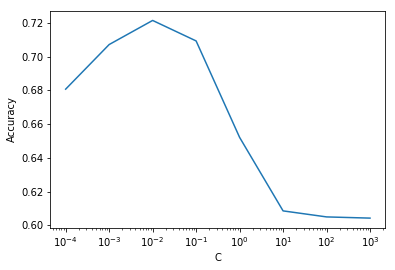

In [103]:
ax = plt.gca()

ax.plot(interval, mean_scores)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.axis('tight')
plt.show()

In [104]:
C_star = interval[np.argmax(mean_scores)]

clf5 = LinearSVC (C=C_star,class_weight='balanced')
clf5.fit(X_train5, y_train)
clf5.score(X_test5,y_test)

0.71166666666666667

In [105]:
ind_neg = np.argsort(clf5.coef_).flatten()[0:10]
ind_pos = np.argsort(clf5.coef_).flatten()[clf5.coef_.shape[1]-10:]

print(np.array(vectorizer5.get_feature_names())[ind_neg])
print(np.array(vectorizer5.get_feature_names())[ind_pos])

['could have been' 'of the worst' 'supposed to be' 'in this movie'
 'would have been' 'to work with' 'is supposed to' 'of the movie'
 'in the movie' 'to be funny']
['some of the' 'but it is' 'one of his' 'is able to' 'is one of'
 'in the world' 'as well as' 'one of the' 'the film is' 'of the best']


In [107]:
np.array(vectorizer5.get_feature_names())[ind_pos]

array(['some of the', 'but it is', 'one of his', 'is able to', 'is one of',
       'in the world', 'as well as', 'one of the', 'the film is',
       'of the best'],
      dtype='<U71')

## Version 6 : uppercase /Removing accents/Keeping the top 10000 occurring tokens/removing stopwords   3-grammes

In [56]:
vectorizer6 = build_vectorizer(alltxts,stopwords=stop_words,\
                         b_lowercase=False, b_accent=False,\
                                           max_f=10000,n=(2,2),l=1)
X_train6 = vectorize_docs(vectorizer6, text_train) 
X_test6 = vectorize_docs(vectorizer6, text_test)

Removing numbers
Keeping uppercase
Removing accents
Keeping the top 10000 occurring tokens


In [57]:
mean_scores  = []
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]
for C in interval:
    clf = LinearSVC(C=C,class_weight='balanced')
    scores = cross_val_score(clf, X_train6, y_train, cv=10)
    mean_scores.append(np.mean(scores))

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


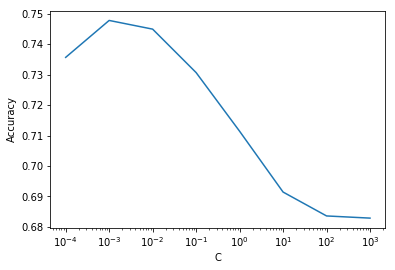

In [58]:
ax = plt.gca()

ax.plot(interval, mean_scores)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.axis('tight')
plt.show()

In [59]:
C_star = interval[np.argmax(mean_scores)]

clf6 = LinearSVC (C=C_star,class_weight='balanced')
clf6.fit(X_train6, y_train)
clf6.score(X_test6,y_test)

0.75666666666666671

In [39]:
clf6 = LinearSVC(C=C_star)
pred6 = eval_on_final_test(vectorizer6, clf6, alltxts, all_labs, txt_test, 6,l=1)